# Predicting the Number of Bikers Crossing the Fremont Bridge on Fridays in July, 2016

mean of west:  73.76331360946746
mean of east:  77.01183431952663
mode of west:  1
Two east modes:  4 , 5
median of west:  47
median of east:  53


[0, 500, 0, 80]

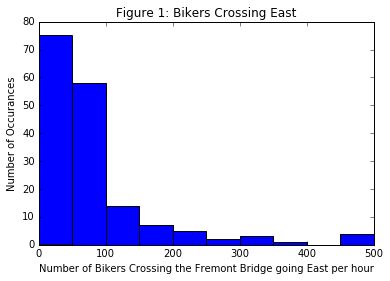

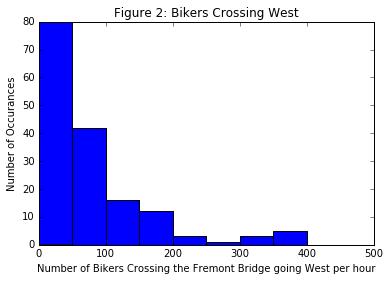

In [23]:
%matplotlib inline
#File Reading
#Emma Anderson, Big Data, 1/22/16
#open and save the file for reading
import numpy as np;
import statistics as stat;
from collections import Counter;
import matplotlib.pyplot as plt;

data_file = open("FreBridge.csv", "r");
#create an empty list to store the data
data_list = [];
#put all lines from the file into a list
for ii in data_file:
    data_list.append(ii);

#remove the first element (column header)
del data_list[0];
#create empty lists for westbound and eastbound bikes
west = [];
east = [];    
for jj in range(len(data_list)):
    #strip off the \n (newline)
    data_list[jj] = data_list[jj].replace("\n", "");
    #make into a list of lists of just numbers
    data_list[jj] = data_list[jj].split(",");
    #add data to specific lists for west and east
    west.append(int(data_list[jj][1]));
    east.append(int(data_list[jj][2]));

print("mean of west: ", stat.mean(west))
print("mean of east: ", stat.mean(east))
print("mode of west: ", stat.mode(west))
try:
    print("mode of east: ", stat.mode(east))
except: 
    data = Counter(east)
    print("Two east modes: ", data.most_common(1)[0][0], ",", data.most_common(2)[1][0])
##there are two equal modes for east, not sure how to print both
print("median of west: ", stat.median(west))
print("median of east: ", stat.median(east))

##indexing print(west[100])
##print(data_list[100])
plt.hist(east, bins=(0,50,100,150,200,250,300,350,400,450,500))
plt.title("Figure 1: Bikers Crossing East")
plt.xlabel("Number of Bikers Crossing the Fremont Bridge going East per hour")
plt.ylabel("Number of Occurances")
plt.axis([0, 500, 0, 80])
secondPlot = plt.figure()
ax2 = secondPlot.add_subplot(111)
ax2.hist(west, bins=(0,50,100,150,200,250,300,350,400,450,500))
plt.title("Figure 2: Bikers Crossing West")
plt.xlabel("Number of Bikers Crossing the Fremont Bridge going West per hour")
plt.ylabel("Number of Occurances")
plt.axis([0, 500, 0, 80])


Figure 1 and Figure 2 are graphs of the bikers crossing the Fremont Bridge, going east and west, respectively. I believe the mean provides the most information about these distribuitions. While the mean has been pulled right, as both graphs are skewed right, the skewed information is more useful than the information that isn't skewed. For example, while the mode is most representative of this distribution (if you pick a sample at random, the probability that it will be the mode is higher than the probability that it will be any other random sample), that information isn't very useful. The data was collected over the course of twenty four hours, so the very low modes probably reflect the fact that at night (12 hours out of the day), very few bikers were crossing the bridge. But very few other people cross the bridge late at night. So if I as an individual want to know about how many bikers will be crossing the bridge when I happen to cross the bridge, the mode won't be very useful, as I'm more likely to cross it during the day. Therefore, the mean (around 77 going east, 74 going west), which is skewed furthest right, is most useful to me. 

Mean before removing outliers: 3671.84615385
Low outlier removed: 2313
The median number of bikers crossing the Fremont bridge on all Fridays in July from 
2012-2014 is 3850.0
The mean number of bikers crossing the Fremont bridge on all Fridays in July from 
2012-2014 is 3785.08333333
Therefore, we can predict that on any given Friday in July in 2016, around 3785.0 bikers will cross the Fremont bridge.


[3000, 4500, 0, 4]

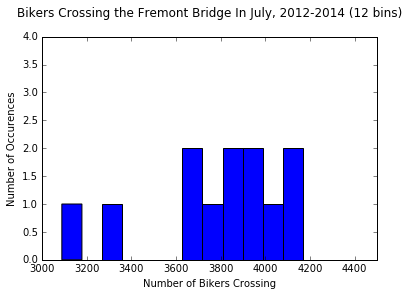

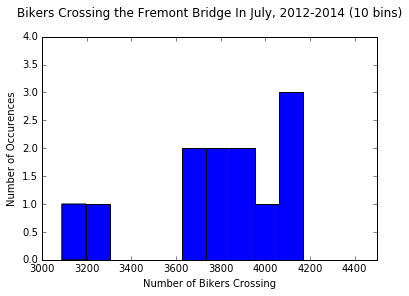

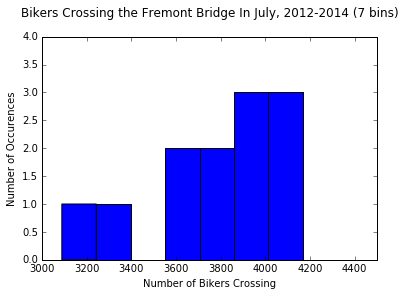

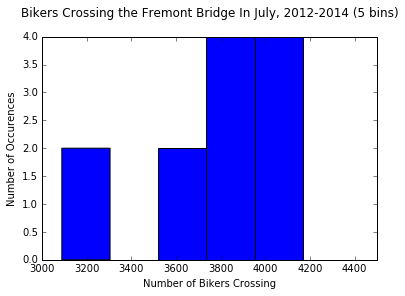

In [3]:
%matplotlib inline
import datetime
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt;
data_july = open("FreBridgeJuly.csv", "r");
#create an empty list to store the data
data_listjuly = [];
#put all lines from the file into a list
for ii in data_july:
    data_listjuly.append(ii);

#remove the first element (column header)
del data_listjuly[0];

west_july = [];
east_july = [];   
date_july = [];
for pp in range(len(data_listjuly)):
    #strip off the \n (newline)
    data_listjuly[pp] = data_listjuly[pp].replace("\n", "");
    #make into a list of lists of just numbers
    data_listjuly[pp] = data_listjuly[pp].split(",");
    #add data to specific lists for west and east
    date_july.append(data_listjuly[pp][0]);
    west_july.append(int(data_listjuly[pp][1]));
    east_july.append(int(data_listjuly[pp][2]));

##print(date_july) ##name of string[1] to get 2nd element (will be 7s if july). 
##print(west_july);
##print(east_july)

starting_date = datetime.date(2015,12,31)
change_time = datetime.timedelta(days=-1)

july_friday = [];
for day in range(len(date_july)):
    if starting_date.weekday()== 4 and starting_date.month == 7: ##monday is 0
        total_july = west_july[day] + east_july[day]
        july_friday.append(total_july)
        ##first element 

    starting_date += change_time; 
    

numpy_july_friday = np.array(july_friday)
numpy_july_friday = np.sort(numpy_july_friday)
quartile1 = stat.median(numpy_july_friday[0:6:1])##[first, middle, step size]
quartile3 = stat.median(numpy_july_friday[6:12:1])
IQR = quartile3-quartile1
upperBound = quartile3 + 1.5*IQR
lowerBound = quartile1 - 1.5*IQR
print("Mean before removing outliers:", stat.mean(numpy_july_friday))
july_friday_no_outlier = [];
for ii in range (len(numpy_july_friday)): ##for loop checking if outlier
    if numpy_july_friday[ii] >= lowerBound: ##is term not low outlier
        if numpy_july_friday[ii] <= upperBound: ##is term not high outlier
            july_friday_no_outlier.append(numpy_july_friday[ii]) ##if both true, append
        else:
            print("High outlier removed:", numpy_july_friday[ii]) ##print low outlier
    else:
        print("Low outlier removed:", numpy_july_friday[ii]) ##print high outlier
        
mean_july_friday = np.mean(july_friday_no_outlier)
rounded_july_friday = round(mean_july_friday)
print("The median number of bikers crossing the Fremont bridge on all Fridays in July from \n2012-2014 is", stat.median(july_friday_no_outlier))
print("The mean number of bikers crossing the Fremont bridge on all Fridays in July from \n2012-2014 is", mean_july_friday)
print("Therefore, we can predict that on any given Friday in July in 2016, around", rounded_july_friday, "bikers will cross the Fremont bridge.")
plt.hist(july_friday_no_outlier, bins=(12))
plt.xlabel("Number of Bikers Crossing")
plt.ylabel("Number of Occurences")
plt.title("Bikers Crossing the Fremont Bridge In July, 2012-2014 (12 bins)\n")
plt.axis([3000, 4500, 0, 4])
secondPlot = plt.figure()
ax2 = secondPlot.add_subplot(111)
ax2.hist(july_friday_no_outlier, bins=(10))
plt.xlabel("Number of Bikers Crossing")
plt.ylabel("Number of Occurences")
plt.title("Bikers Crossing the Fremont Bridge In July, 2012-2014 (10 bins)\n")
plt.axis([3000, 4500, 0, 4])
secondPlot = plt.figure()
ax3 = secondPlot.add_subplot(111)
ax3.hist(july_friday_no_outlier, bins=(7))
plt.xlabel("Number of Bikers Crossing")
plt.ylabel("Number of Occurences")
plt.title("Bikers Crossing the Fremont Bridge In July, 2012-2014 (7 bins)\n")
plt.axis([3000, 4500, 0, 4])
secondPlot = plt.figure()
ax4 = secondPlot.add_subplot(111)
ax4.hist(july_friday_no_outlier, bins=(5))
plt.xlabel("Number of Bikers Crossing")
plt.ylabel("Number of Occurences")
plt.title("Bikers Crossing the Fremont Bridge In July, 2012-2014 (5 bins)\n")
plt.axis([3000, 4500, 0, 4])

I found outliers in this data set by calculating the inner quartile range (IQR), then removing data points that were more than 1.5 IQR less than the 1st quartile, or more than 1.5 IQR greater than the 3rd quartile. Then, I calculated the mean and median from the data points that were not outliers. There is no mode (all 12 data points are different). 

It's hard to tell what the distribution of this data set is because of its small size. For example, depending on bin size, the histogram can look like a normal skewed left, exponential with a tail to the left, or fairly uniform (see figures above). Because of this, we can't tell which way the mean or median have been pulled. In addtion, and the median (3850) is only 65 greater than the mean (3785). Since thousands of bikers are crossing the bridge every day, a difference of 65 between the mean and the median is trivial. 

I chose the mean because it, unlike the median, takes into account the numerical values of all the data points. The median relies on the shape of the distribution to find an average, not the actual data points. We shouldn't rely on assumptions about the way the data is distributed to get an average, especially since the distribution of this data set is unclear. In addition, because we're trying to predict the number of bikers crossing in the future, and we have all the data points, it makes sense to take into account all the information we have. 